Primeras filas de productos:


,ID_Producto,Categoria,Precio,Moneda,Marca,Descripción,Rating_Promedio
0,1,Tecnología,104.90,COP,HA,sinergia didáctica reactivo,3.4
1,2,Electrónica,38.80,MXN,Apple,algoritmo modular extendido,4.4
2,3,Electrohogar,807.27,MXN,GE,Reduced grid-enabled architecture,3.3
3,4,Electrónica,506.60,COP,Panasonic,Multi-layered well-modulated task-force,3.8
4,5,Tecnología,525.04,CLP,Panasonic,Implemented leadingedge solution,4.2


Primeras filas de interacciones:


,ID_Interacción,ID_Usuario,ID_Producto,Acción,Fecha,Calificación
0,1,22,12,Vista,2024-06-25,4
1,2,12,1,Carrito,2024-04-18,5
2,3,42,4,Compra,2024-02-14,0
3,4,17,72,Vista,2024-08-03,0
4,5,42,49,Añadir a lista de deseos,2024-04-18,3



Información de los productos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Producto      100 non-null    int64  
 1   Categoria        100 non-null    object 
 2   Precio           100 non-null    float64
 3   Moneda           100 non-null    object 
 4   Marca            100 non-null    object 
 5   Descripción      100 non-null    object 
 6   Rating_Promedio  100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB

Información de las interacciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_Interacción  500 non-null    int64 
 1   ID_Usuario      500 non-null    int64 
 2   ID_Producto     500 non-null    int64 
 3   Acción          500 non-nu

,ID_Producto,Precio,Rating_Promedio
count,100.000000,100.00000,100.000000
mean,50.500000,518.38360,3.131000
std,29.011492,322.78751,1.161738
min,1.000000,22.82000,1.000000
25%,25.750000,206.65000,2.300000
50%,50.500000,561.23500,3.150000
75%,75.250000,808.57500,4.200000
max,100.000000,990.19000,5.000000



Descripción estadística de las interacciones:


,ID_Interacción,ID_Usuario,ID_Producto,Calificación
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,25.150000,48.740000,1.460000
std,144.481833,14.706872,28.181071,1.799688
min,1.000000,1.000000,1.000000,0.000000
25%,125.750000,12.000000,26.000000,0.000000
50%,250.500000,24.000000,49.000000,0.000000
75%,375.250000,39.000000,72.000000,3.000000
max,500.000000,50.000000,100.000000,5.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


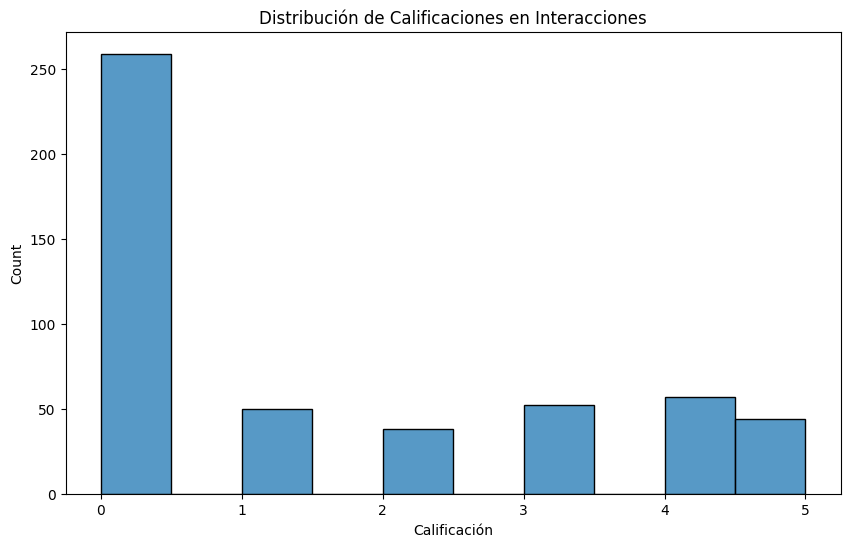

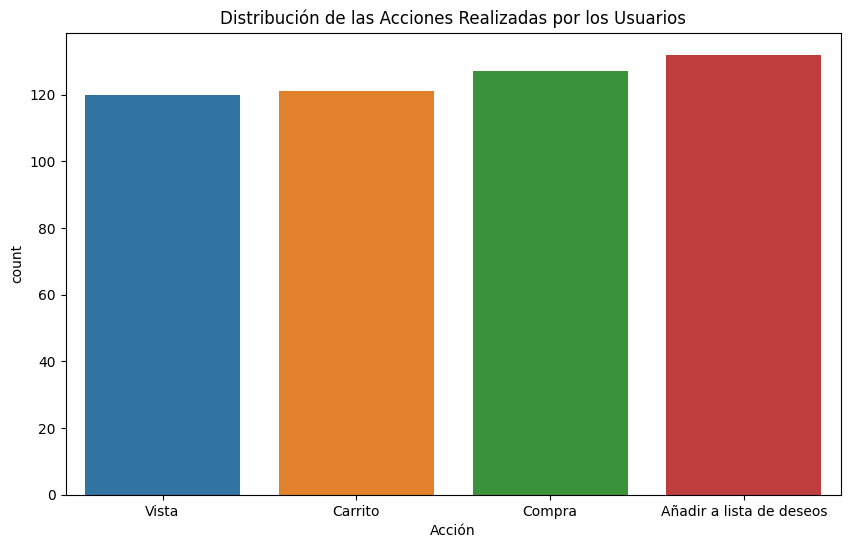

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

productos = pd.read_csv('/kaggle/input/dataset-trabajofinal-modulosypaquetes/productos.csv')
interacciones = pd.read_csv('/kaggle/input/dataset-trabajofinal-modulosypaquetes/interacciones.csv')
usuarios = pd.read_csv('/kaggle/input/dataset-trabajofinal-modulosypaquetes/usuarios.csv')

print("Primeras filas de productos:")
display(productos.head())

print("Primeras filas de interacciones:")
display(interacciones.head())

print("\nInformación de los productos:")
productos.info()

print("\nInformación de las interacciones:")
interacciones.info()

print("\nDescripción estadística de los productos:")
display(productos.describe())

print("\nDescripción estadística de las interacciones:")
display(interacciones.describe())


plt.figure(figsize=(10, 6))
sns.histplot(interacciones['Calificación'], kde=False, bins=10)
plt.title('Distribución de Calificaciones en Interacciones')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=interacciones, x='Acción')
plt.title('Distribución de las Acciones Realizadas por los Usuarios')
plt.show()



In [4]:
recomendaciones = pd.DataFrame()

productos_carrito_alto = interacciones[(interacciones['Acción'] == 'Carrito') & (interacciones['Calificación'] >= 4)]
productos_recomendados = productos_carrito_alto.groupby('ID_Usuario')['ID_Producto'].apply(list).reset_index()
productos_recomendados.columns = ['ID_Usuario', 'Producto_Recomendado']

usuarios = pd.read_csv('/kaggle/input/dataset-trabajofinal-modulosypaquetes/usuarios.csv')
usuarios_recomendados = pd.merge(usuarios, productos_recomendados, on='ID_Usuario', how='left')
usuarios_recomendados['Producto_Recomendado'] = usuarios_recomendados['Producto_Recomendado'].apply(lambda x: x if isinstance(x, list) else [])
usuarios_recomendados.to_csv('usuarios_con_recomendaciones.csv', index=False)

display(usuarios_recomendados.head())


,ID_Usuario,Nombre,Edad,Género,Ubicación,Preferencias,Likes,Producto_Recomendado
0,1,Raquel Mercedes Arguello Tijerina,19,Femenino,Mostazal,Electrónica,"[95, 100]",[]
1,2,Juan Agüero García,29,Masculino,Trujillo,"Tecnología, Ropa","[19, 61, 56, 1]",[]
2,3,Bernardino Bravo,36,Femenino,Arequipa,"Tecnología, Electrónica, Ropa","[38, 44, 96, 20, 89]",[]
3,4,Santino Benjamin Luisana Bravo Maidana,39,Masculino,Chillán,Electrónica,"[98, 1, 77, 83, 19]",[46]
4,5,María Mayte Rangel,52,Femenino,San Estefanía los altos,"Gaming, Electrohogar","[46, 93]",[18]
